In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
import statsmodels.api as sm

In [2]:
# printing verions of Python modules and packages with **watermark** 
# documention for installing watermark: https://github.com/rasbt/watermark

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
matplotlib: 3.5.2
seaborn   : 0.11.2



In [3]:
%%time

# path on the web
path = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(path)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (1083794, 16)
CPU times: user 8.36 s, sys: 3.02 s, total: 11.4 s
Wall time: 3min 55s


,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
type(df['CNSTRCT_YR'])

pandas.core.series.Series

In [6]:
# summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083794 entries, 0 to 1083793
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1083794 non-null  object 
 1   NAME        2253 non-null     object 
 2   BIN         1083794 non-null  int64  
 3   CNSTRCT_YR  1073397 non-null  float64
 4   LSTMODDATE  1083794 non-null  object 
 5   LSTSTATYPE  1083479 non-null  object 
 6   DOITT_ID    1083794 non-null  int64  
 7   HEIGHTROOF  1081139 non-null  float64
 8   FEAT_CODE   1083794 non-null  int64  
 9   GROUNDELEV  1083230 non-null  float64
 10  SHAPE_AREA  1083794 non-null  int64  
 11  SHAPE_LEN   1083794 non-null  int64  
 12  BASE_BBL    1083794 non-null  int64  
 13  MPLUTO_BBL  1083794 non-null  int64  
 14  GEOMSOURCE  1083477 non-null  object 
 15  GLOBALID    1083794 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 132.3+ MB


In [7]:
df.isnull().sum()

the_geom            0
NAME          1081541
BIN                 0
CNSTRCT_YR      10397
LSTMODDATE          0
LSTSTATYPE        315
DOITT_ID            0
HEIGHTROOF       2655
FEAT_CODE           0
GROUNDELEV        564
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL          0
GEOMSOURCE        317
GLOBALID            0
dtype: int64

In [8]:
df.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.083794e+06,1.073397e+06,1.083794e+06,1.081139e+06,1.083794e+06,1.083230e+06,1083794.0,1083794.0,1.083794e+06,1.083794e+06
mean,3.712884e+06,1.939602e+03,5.947852e+05,2.769068e+01,2.693847e+03,5.512086e+01,0.0,0.0,3.564096e+09,3.564096e+09
std,1.026702e+06,2.943843e+01,3.621236e+05,2.177047e+01,1.198875e+03,4.155021e+01,0.0,0.0,9.859022e+08,9.859022e+08
min,1.000002e+06,1.652000e+03,1.000000e+00,0.000000e+00,1.000000e+03,-1.600000e+01,0.0,0.0,1.000010e+09,1.000010e+09
25%,3.129658e+06,1.920000e+03,2.880562e+05,1.850000e+01,2.100000e+03,2.500000e+01,0.0,0.0,3.043360e+09,3.043360e+09
50%,4.067866e+06,1.930000e+03,5.763075e+05,2.612000e+01,2.100000e+03,4.600000e+01,0.0,0.0,4.019530e+09,4.019530e+09
75%,4.483420e+06,1.955000e+03,8.663708e+05,3.113000e+01,2.100000e+03,7.400000e+01,0.0,0.0,4.107010e+09,4.107010e+09
max,5.799523e+06,2.024000e+03,1.301600e+06,1.550000e+03,5.110000e+03,1.335000e+03,0.0,0.0,6.000000e+09,6.000000e+09


In [9]:
df.describe(include='object')

,the_geom,NAME,LSTMODDATE,LSTSTATYPE,GEOMSOURCE,GLOBALID
count,1083794,2253,1083794,1083479,1083477,1083794
unique,1083794,1894,1758,13,3,1083794
top,MULTIPOLYGON (((-73.96664570466969 40.62599676...,Adler Place Town Houses,08/22/2017 12:00:00 AM,Constructed,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
freq,1,52,800938,1081056,1012628,1


# Estimates of Location

In [10]:
df['CNSTRCT_YR'].count()

1073397

In [11]:
print(df['CNSTRCT_YR'].mean())
print(df['CNSTRCT_YR'].median())
print(df['CNSTRCT_YR'].min())
print(df['CNSTRCT_YR'].max())

1939.6017018866273
1930.0
1652.0
2024.0


In [12]:
print(df['CNSTRCT_YR'].quantile(q=.5))
print(df['CNSTRCT_YR'].quantile(q=[.25, .50, .75]))

1930.0
0.25    1920.0
0.50    1930.0
0.75    1955.0
Name: CNSTRCT_YR, dtype: float64


In [13]:
df['CNSTRCT_YR'].describe()

count    1.073397e+06
mean     1.939602e+03
std      2.943843e+01
min      1.652000e+03
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.024000e+03
Name: CNSTRCT_YR, dtype: float64

In [14]:
print(df['CNSTRCT_YR'].std())
print(df['CNSTRCT_YR'].quantile(0.75) - df['CNSTRCT_YR'].quantile(0.25))
print(sm.robust.scale.mad(df['CNSTRCT_YR'].dropna()))

29.438431190275487
35.0
22.239033277584028


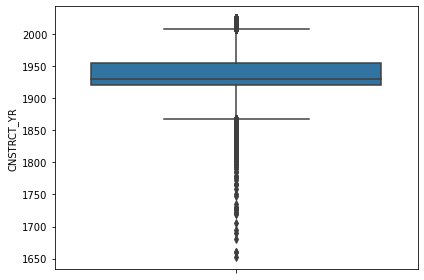

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(y=df['CNSTRCT_YR'], ax=ax)

plt.tight_layout()

In [16]:
years_binned = pd.cut(df['CNSTRCT_YR'], bins=25)

years_binned.value_counts()

(1919.84, 1934.72]     415403
(1949.6, 1964.48]      153573
(1934.72, 1949.6]      139253
(1904.96, 1919.84]      91884
(1994.24, 2009.12]      63906
(1890.08, 1904.96]      63146
(1964.48, 1979.36]      60651
(1979.36, 1994.24]      50414
(2009.12, 2024.0]       19986
(1875.2, 1890.08]        7586
(1860.32, 1875.2]        3054
(1845.44, 1860.32]       2730
(1830.56, 1845.44]       1144
(1815.68, 1830.56]        387
(1785.92, 1800.8]         216
(1800.8, 1815.68]          36
(1771.04, 1785.92]          6
(1726.4, 1741.28]           5
(1756.16, 1771.04]          4
(1711.52, 1726.4]           4
(1651.628, 1666.88]         3
(1741.28, 1756.16]          2
(1681.76, 1696.64]          2
(1666.88, 1681.76]          1
(1696.64, 1711.52]          1
Name: CNSTRCT_YR, dtype: int64

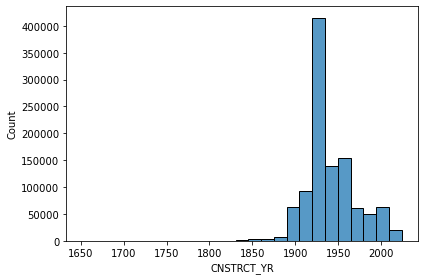

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(df['CNSTRCT_YR'], bins=25, ax=ax)

plt.tight_layout()

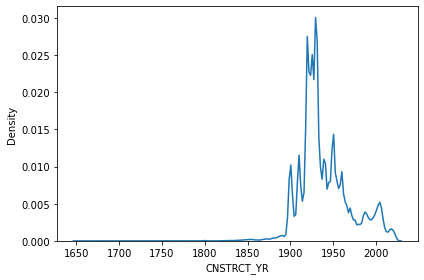

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(df['CNSTRCT_YR'], ax=ax)

plt.tight_layout()

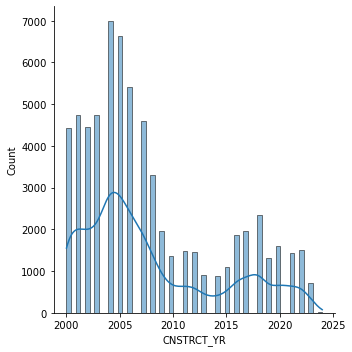

In [19]:
sns.displot(
    df.loc[df['CNSTRCT_YR'] >= 2000, 'CNSTRCT_YR'],
    kde=True
)

plt.tight_layout()

In [20]:
df['LSTSTATYPE'].value_counts()

Constructed                 1081056
Alteration                     1420
Split                           330
Marked for Construction         267
Initialization                   97
Merged                           87
Marked for Demolition            68
Correction                       62
Investigate Construction         52
Geometry                         17
Demolition                       10
Marked for construction           9
Investigate Demolition            4
Name: LSTSTATYPE, dtype: int64

In [21]:
df['LSTSTATYPE'].mode()

0    Constructed
Name: LSTSTATYPE, dtype: object

In [22]:
df['LSTSTATYPE'].value_counts()

Constructed                 1081056
Alteration                     1420
Split                           330
Marked for Construction         267
Initialization                   97
Merged                           87
Marked for Demolition            68
Correction                       62
Investigate Construction         52
Geometry                         17
Demolition                       10
Marked for construction           9
Investigate Demolition            4
Name: LSTSTATYPE, dtype: int64

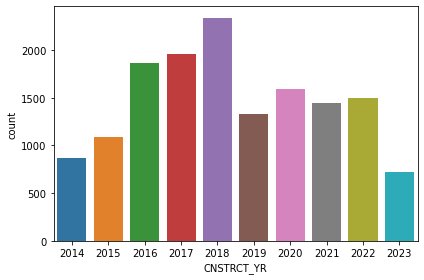

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))

bar_df = (
    df
    .loc[df['CNSTRCT_YR'].between(2014, 2023)]
    .astype({'CNSTRCT_YR':'int32'})
    .groupby(by='CNSTRCT_YR')['DOITT_ID']
    .count()
    .reset_index()
    .rename(columns={'DOITT_ID':'count'})
)


sns.barplot(
    x='CNSTRCT_YR',
    y='count',
    data=bar_df
)

plt.tight_layout()

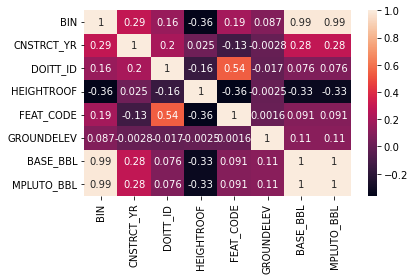

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(
    df.drop(columns=['SHAPE_AREA', 'SHAPE_LEN'])
        .corr(),
    ax=ax,
    annot=True
)

plt.tight_layout()

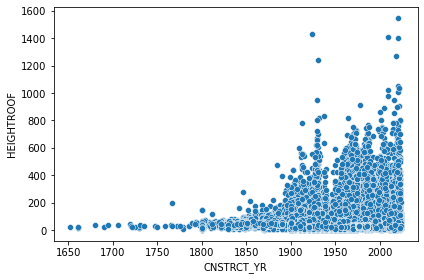

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=df['CNSTRCT_YR'],
    y=df['HEIGHTROOF']
)

plt.tight_layout()

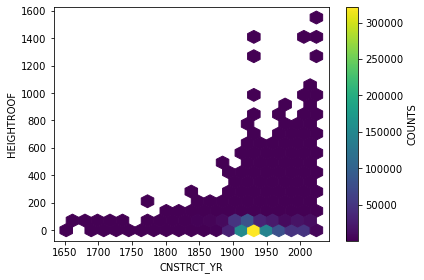

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))

hb = ax.hexbin(
    x=df['CNSTRCT_YR'],
    y=df['HEIGHTROOF'],
    gridsize=20,
    mincnt=1,
    cmap='viridis'
)

cb = fig.colorbar(hb, ax=ax, label='COUNTS')
ax.set_xlabel('CNSTRCT_YR')
ax.set_ylabel('HEIGHTROOF')

plt.tight_layout()